create a torque dataset from the trajectory

In [12]:
import os.path
import sys
import numpy as np 
import matplotlib.pyplot as plt
import torch

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from utils.data_loader import DataLoader, TorqueLoader
from models.dmp import CanonicalSystem, SingleDMP

# print current path
print(os.getcwd())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

/home/binzhao/Documents/code/VAE_DMP_mani/number_write_task
Using device: cuda


load the hand written number trajectory, do data augmentation, and create a torque dataset

In [14]:
cs = CanonicalSystem(dt=0.01, ax=1)
dmp = SingleDMP(n_bfs=50, cs=cs, run_time=1.0, dt=0.01)
data_path = "../data/number_write/"

torque_loader = TorqueLoader(dmp=dmp, run_time=1.0, dt=0.01, dof=2)
torque_loader.load_data_all(data_path)
# generate trajectory with data augmentation
torque_loader.data_augment(number=10000, weight_random=0.3)

In [15]:
print("Data Augmentation Done")
print("length of trajectories: ", len(torque_loader.paths))

Data Augmentation Done
length of trajectories:  100000


In [16]:
# change trajecotries to torques
torque_loader.gen_torque_dataset()

In [17]:
# save the dataset
torque_loader.save_data("../data/number_write/train_torque")

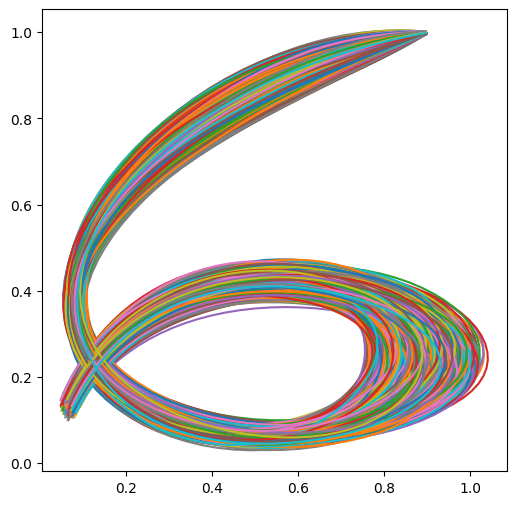

In [18]:
# plot the augmented data
check_number = 6
plt.figure(2, figsize=(6, 6))
# load all the data in the loader
for i in range(len(torque_loader)):
    inter, label = torque_loader.paths[i],torque_loader.labels[i]
    if label[0] == check_number:
        plt.plot(inter[:, 0], inter[:, 1])

plt.axis("equal")
plt.show()

In [19]:
# show normalized data, and denormalized data
torque_loader.normalize_data(device=device)
print("Data Normalization Done")
print("shape of normalized data: ", torque_loader.torque_norm.shape)
print("length of the label", len(torque_loader.labels))
print("max torque", torque_loader.max)
print("min torque", torque_loader.min)

Data Normalization Done
shape of normalized data:  torch.Size([100, 100000, 2])
length of the label 100000
max torque tensor([178.5698, 199.0784], device='cuda:0')
min torque tensor([-187.8544, -179.2354], device='cuda:0')


In [20]:
# reshape the data
noralized_data = torque_loader.torque_norm.permute(1, 2, 0).detach()
print("shape of reshaped normalized data: ", noralized_data.shape)

shape of reshaped normalized data:  torch.Size([100000, 2, 100])


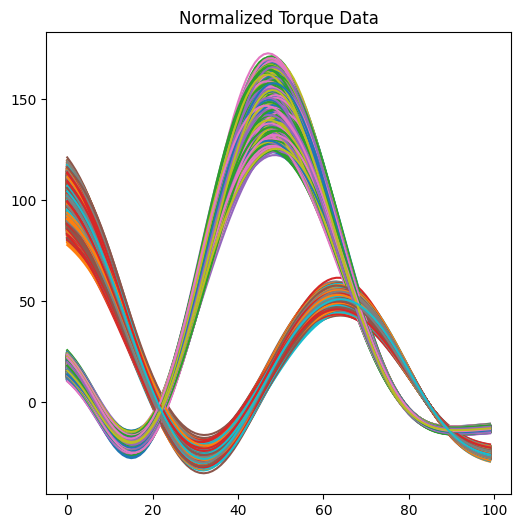

In [21]:
# plot the original torque data
plt.figure(3, figsize=(6, 6))
for i in range(len(torque_loader)):
    inter, label = torque_loader.torque[:, i, :], torque_loader.torque_labels[i]
    if label[0] == 6:
        plt.plot(inter[:, 0].cpu().numpy())
        plt.plot(inter[:, 1].cpu().numpy())
# add title 
plt.title("Normalized Torque Data")
plt.show()

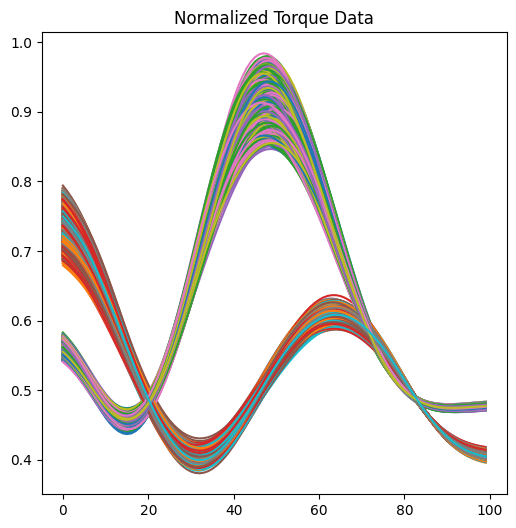

In [22]:
# plot the augmented torque data
plt.figure(3, figsize=(6, 6))
for i in range(len(torque_loader)):
    inter, label = torque_loader.torque_norm[:, i, :], torque_loader.torque_labels[i]
    if label[0] == 6:
        plt.plot(inter[:, 0].cpu().numpy())
        plt.plot(inter[:, 1].cpu().numpy())
# add title 
plt.title("Normalized Torque Data")
plt.show()

shape of denormalized data:  torch.Size([100000, 2, 100])


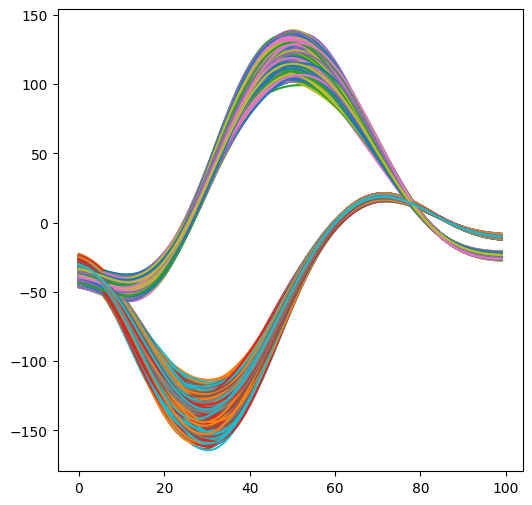

In [23]:
# plot the denormalized torque data
plt.figure(4, figsize=(6, 6))
denoralized_torque = torque_loader.denormalize_data(noralized_data)
# print shape of denormalized data
print("shape of denormalized data: ", denoralized_torque.shape)

for i in range(len(torque_loader)):
    label = torque_loader.labels[i]
    inter = denoralized_torque[i, :, :].cpu().numpy()
                                     
    if label[0] == 0:
        plt.plot(inter[0, :])
        plt.plot(inter[1, :])
plt.show()